In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
oil_data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Data/oil.csv')
merged_df = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Dataframes/merged_df.csv')

In [9]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
o_m_df = merged_df.merge(oil_data, on= 'date', how= 'left')

In [11]:
o_m_df.head(20)

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN
4,4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN
5,5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN
6,6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN
7,7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN
8,8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN
9,9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN


In [12]:
o_m_df['date'] = pd.to_datetime(o_m_df['date'])
df = o_m_df.copy()

In [13]:
o_m_df.dtypes

Unnamed: 0              int64
id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
city                   object
state                  object
type                   object
cluster                 int64
dcoilwtico            float64
dtype: object

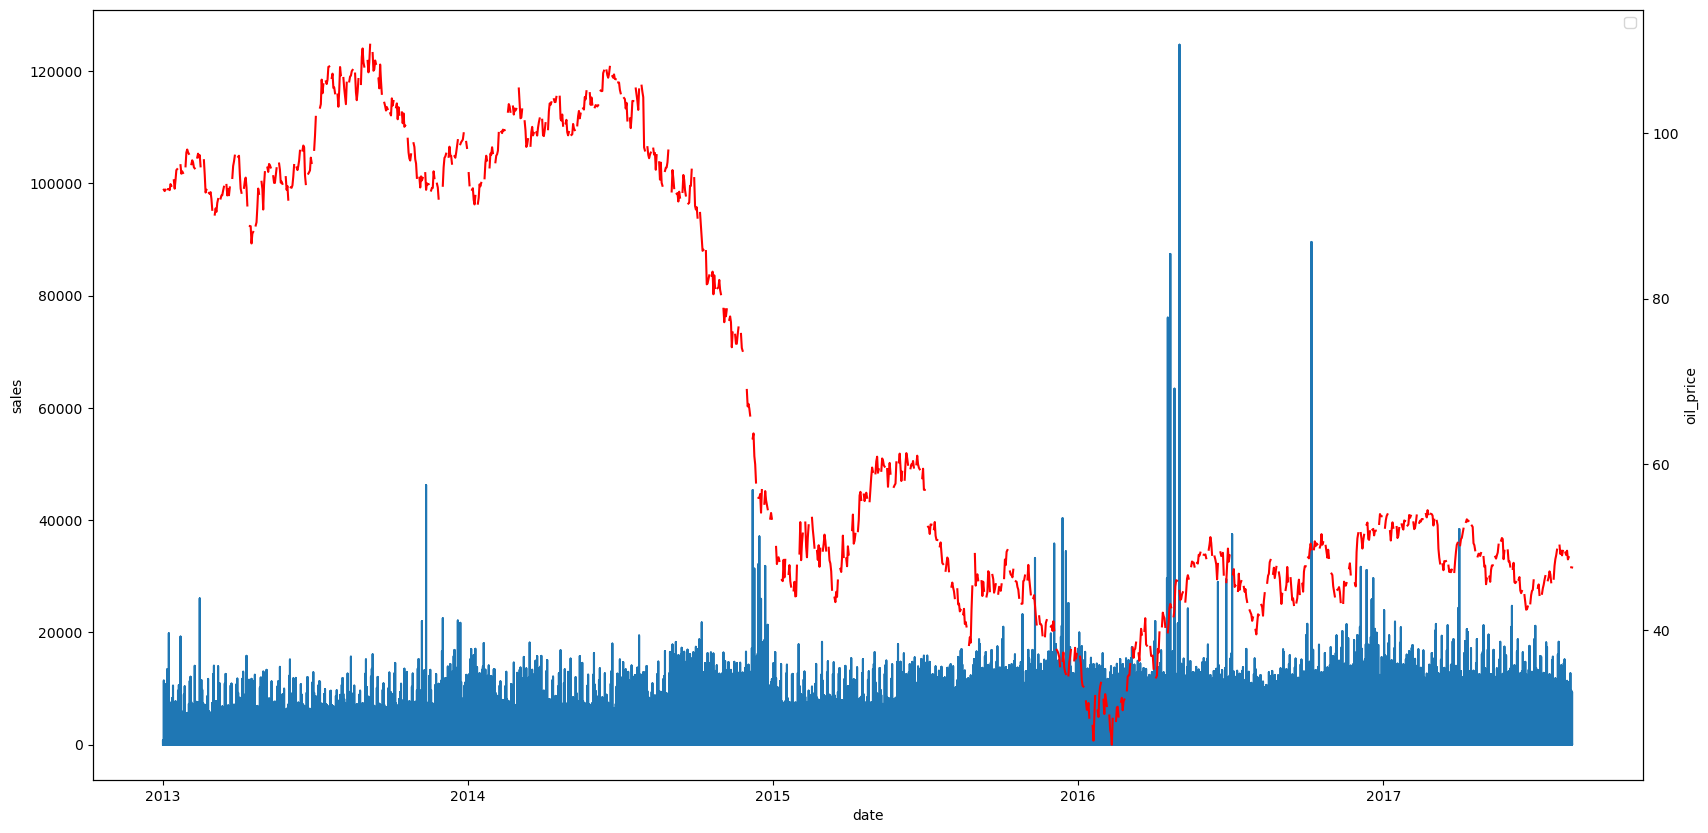

In [14]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1.plot(df['date'], df['sales'])
ax1.set_xlabel('date')
ax1.set_ylabel('sales')

ax2 = ax1.twinx()
ax2.plot(df['date'],df['dcoilwtico'],color = 'red')
ax2.set_ylabel('oil_price')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

In [15]:
df.corr()

C:\Users\bcspr\AppData\Local\Temp\ipykernel_10888\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,id,store_nbr,sales,onpromotion,cluster,dcoilwtico
Unnamed: 0,1.000000,1.000000,3.013308e-04,0.085784,0.206260,-4.369436e-05,-8.395021e-01
id,1.000000,1.000000,3.013308e-04,0.085784,0.206260,-4.369436e-05,-8.395021e-01
store_nbr,0.000301,0.000301,1.000000e+00,0.041196,0.007286,-5.928399e-02,1.295243e-14
sales,0.085784,0.085784,4.119605e-02,1.000000,0.427923,3.852528e-02,-7.905016e-02
onpromotion,0.206260,0.206260,7.285647e-03,0.427923,1.000000,5.666749e-03,-1.524182e-01
cluster,-0.000044,-0.000044,-5.928399e-02,0.038525,0.005667,1.000000e+00,-3.704725e-14
dcoilwtico,-0.839502,-0.839502,1.295243e-14,-0.079050,-0.152418,-3.704725e-14,1.000000e+00


In [16]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls
null = rows_with_nulls.copy()


In [17]:
null['year'] = null['date'].dt.year

In [18]:
null.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,year
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,2013
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,2013
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,2013
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,2013
4,4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,2013


In [19]:
check_dates = null.groupby(['year'])
check_dates['year'].value_counts()

year  year
2013  2013    199584
2014  2014    199584
2015  2015    199584
2016  2016    201366
2017  2017    128304
Name: year, dtype: int64

C:\Users\bcspr\AppData\Local\Temp\ipykernel_10888\3717171696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot= True)


<Axes: >

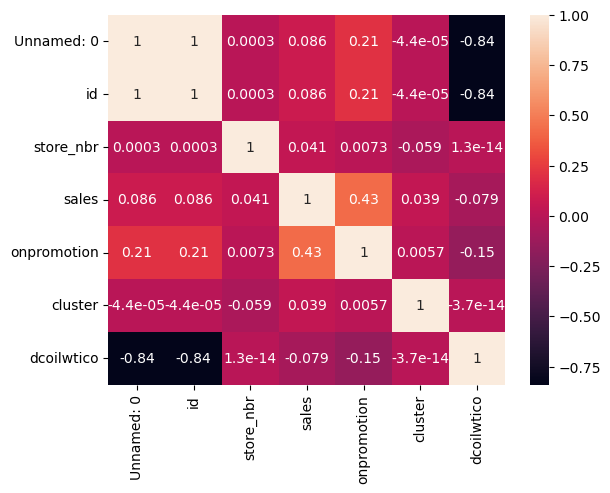

In [20]:
sns.heatmap(data = df.corr(), annot= True)

In [21]:
holiday_df = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Data/holidays_events.csv')

In [22]:
holiday_df.head(20)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [23]:
holiday_df.dtypes


date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [24]:
holiday_df['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [25]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

In [26]:
national_holidays = holiday_df[holiday_df['locale'] == 'National']
regional_holidays = holiday_df[holiday_df['locale'] == 'Regional']
local_holidays = holiday_df[holiday_df['locale'] == 'Local']

In [27]:
df.head(10)

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN
4,4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN
5,5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN
6,6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN
7,7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN
8,8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN
9,9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN


In [28]:
df['national_holiday'] = np.where(df['date'].isin(national_holidays['date']), 1, 0)
df['local_holiday'] = np.where(df['city'].isin(local_holidays['locale_name']), 1, 0)
df['regional_holiday'] = np.where(df['date'].isin(regional_holidays['date']),1,0)

In [29]:
df['regional_holiday'].value_counts()

0    2968812
1      32076
Name: regional_holiday, dtype: int64

In [30]:
df.head(10)

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
4,4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
5,5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
6,6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
7,7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
8,8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0
9,9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN,1,1,0


In [31]:
df.drop(columns= ['Unnamed: 0', 'id'],inplace= True)

C:\Users\bcspr\AppData\Local\Temp\ipykernel_10888\2970510922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot= True)


<Axes: >

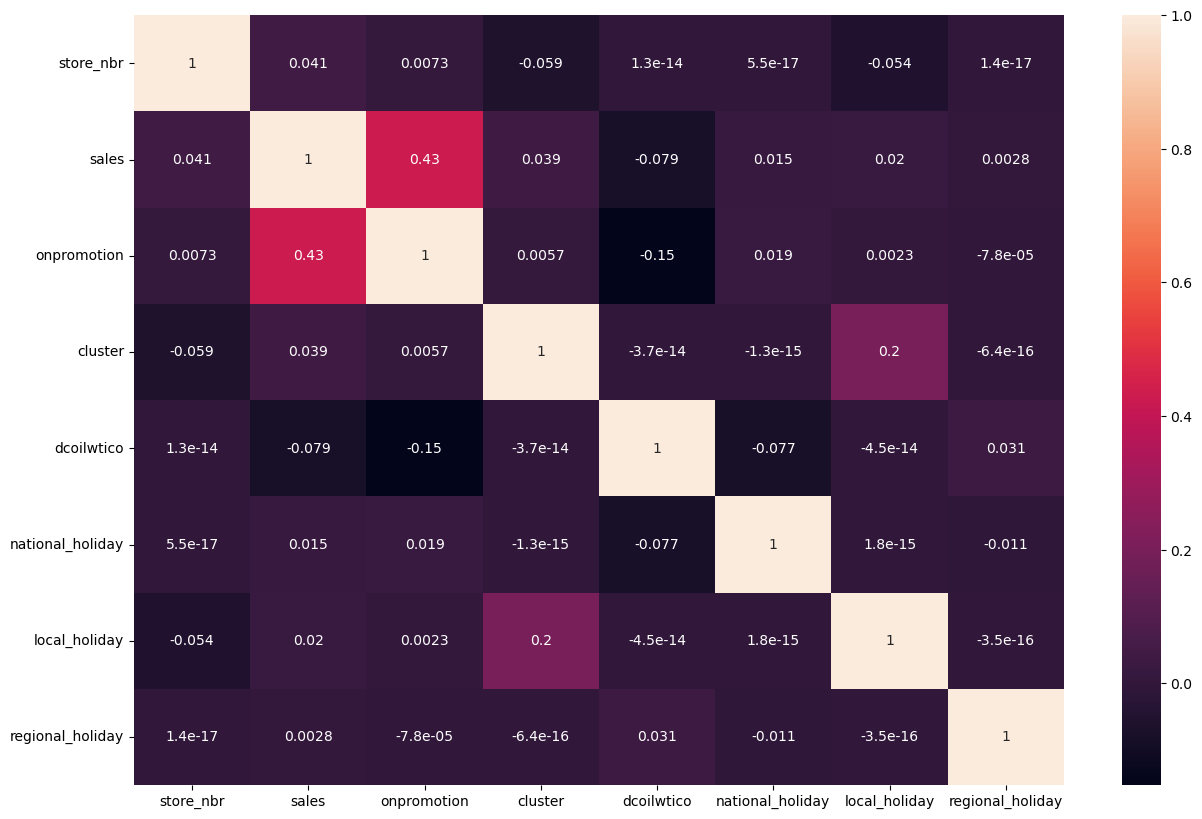

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(), annot= True)

In [33]:
df['dcoilwtico'].fillna(method='bfill', inplace= True)

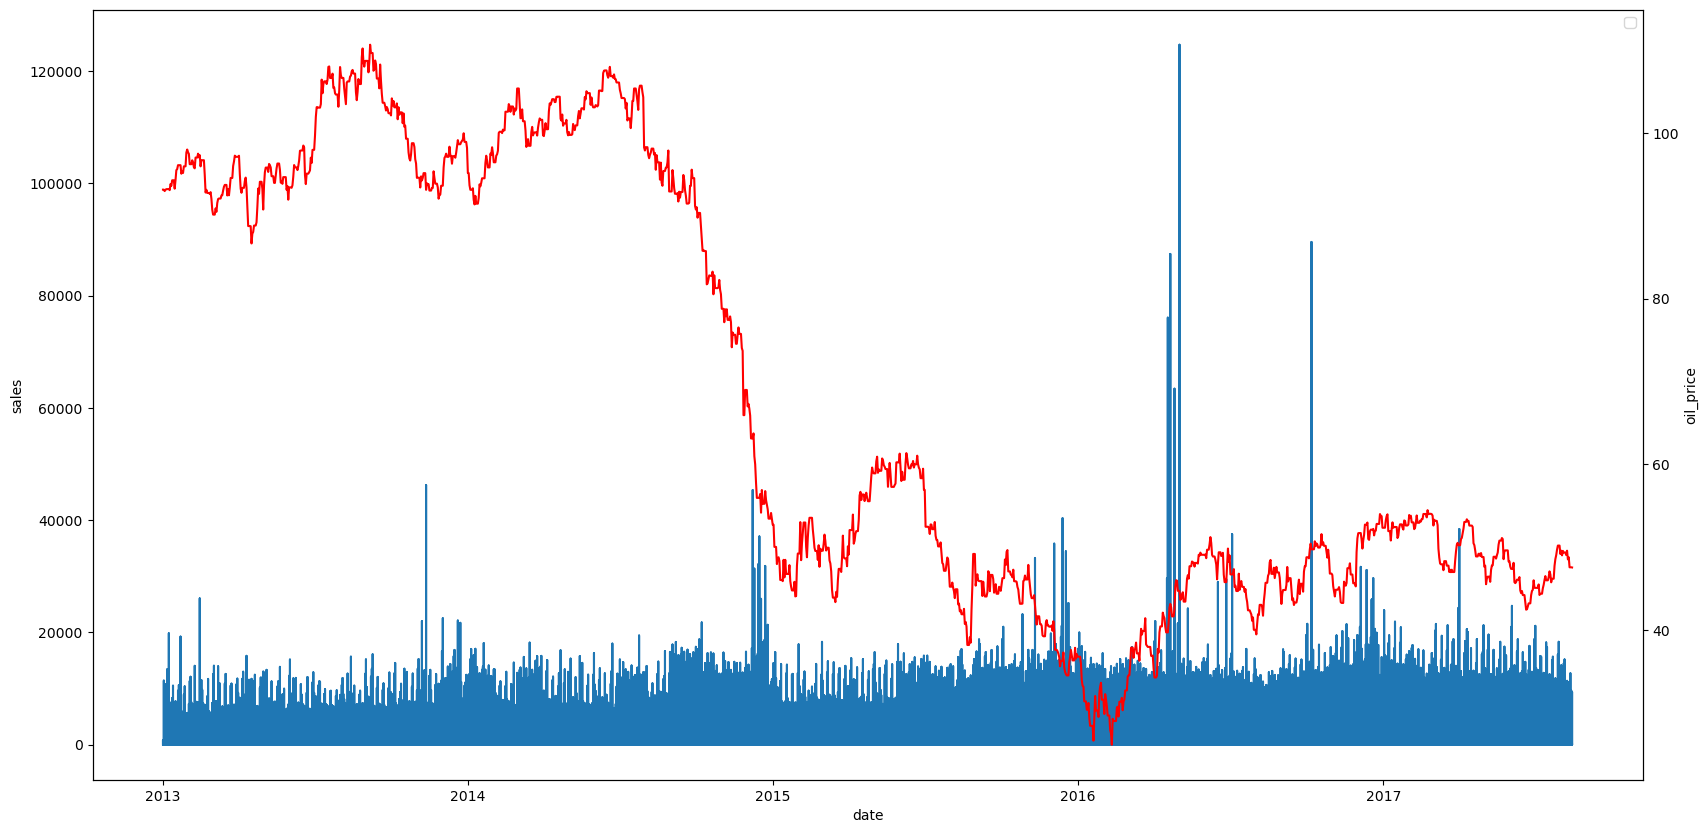

In [34]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1.plot(df['date'], df['sales'])
ax1.set_xlabel('date')
ax1.set_ylabel('sales')

ax2 = ax1.twinx()
ax2.plot(df['date'],df['dcoilwtico'],color = 'red')
ax2.set_ylabel('oil_price')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

In [35]:
df.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0


In [36]:
df_quito = df[df['city'] == 'Quito']
df_quito.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0
9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,93.14,1,1,0


In [37]:
df_minus_quito = df.copy()
df_minus_quito = df_minus_quito[df_minus_quito['city'] != 'Quito']
df_minus_quito.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
66,2013-01-01,11,AUTOMOTIVE,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
67,2013-01-01,11,BABY CARE,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
68,2013-01-01,11,BEAUTY,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
69,2013-01-01,11,BEVERAGES,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
70,2013-01-01,11,BOOKS,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
71,2013-01-01,11,BREAD/BAKERY,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
72,2013-01-01,11,CELEBRATION,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
73,2013-01-01,11,CLEANING,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
74,2013-01-01,11,DAIRY,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
75,2013-01-01,11,DELI,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0


In [38]:
df_quito.to_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Code/df_quito.csv')
df_minus_quito.to_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Code/df_minus_quito.csv')

In [39]:
df.to_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Code/basic_cleaning_done_df.csv')